# 1. 통계적 수치 이해하기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

# 그래프의 폰트 출력을 선명하게 (svg, retina 등이 있음)
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
# 테마 설정: "default", "classic", "dark_background", "fivethirtyeight", "seaborn"
mpl.style.use("default")
# 이미지가 레이아웃 안으로 들어오도록 함
# https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html
mpl.rcParams.update({"figure.constrained_layout.use": True})

#font, line, marker 등의 배율 설정: paper, notebook, talk, poster
sns.set_context("paper") 
#배색 설정: tab10, Set2, Accent, husl
sns.set_palette("Set2") 
#눈금, 배경, 격자 설정: ticks, white, whitegrid, dark, darkgrid
# withegrid: 눈금을 그리고, 각 축의 눈금을 제거
sns.set_style("whitegrid") 

In [2]:
data = {"math": [89, 76, 72, 95], 
     "english": [76, 75, 89, 76],
     "science": [95, 90, 79, 88]}

In [3]:
df = pd.DataFrame(data = data, index=["Ha", "Heo", "Na", "Park"])
df

,math,english,science
Ha,89,76,95
Heo,76,75,90
Na,72,89,79
Park,95,76,88


## 1.1 표준편차(standard deviation, std)

* 집단의 분산의 정도 또는 자료의 산포도를 나타내는 수치
* 표준편차가 작다는 것은 평균값에서 변량들의 거리가 가깝다는 의미

* 모집단 $\mathbf{x}$가 다음의 값을 갖는다고 하자: $\mathbf{x} = (x_1, x_2, \ldots, x_N)$

* 모집단의 평균, 분산, 표준편차는 다음과 같다:

$$\text{mean}({\bf{x}}) =\mu =\frac{\sum_{i=1}^{N}x_i}{N}$$
    
$$\text{var}({\bf{x}}) =\sigma^2 = \frac{\sum_{i=1}^{N}(x_i-\mu)^2}{N}$$
    
$$\text{std}({\bf{x}}) = \sigma = \sqrt{\sigma^2}$$


In [7]:
# df["math"].mean()
math_mean = np.sum(df["math"])/len(df)

print("직접계산한 값: ", math_mean, "/", "pandas가 계산한 값: ", df["math"].mean())

직접계산한 값:  83.0 / pandas가 계산한 값:  83.0


In [8]:
## df["math"].std()를 직접 계산해 보자

math_var = np.sum((df["math"] - math_mean)**2)/len(df)
math_std = np.sqrt(math_var)

print("직접계산한 값: ", math_std, "/", "pandas가 계산한 값: ", df["math"].std())

직접계산한 값:  9.354143466934854 / pandas가 계산한 값:  10.801234497346433


In [9]:
np.sqrt(np.sum((df["math"] - math_mean)**2)/(len(df)-1))

10.801234497346433

* `describe()`와 다른데? `10.801234`	

## 1.2 분산을 $n-1$로 나누는 이유

* 표본집단($X$)을 통해서 모집단의 평균($\mu$)과 분산($\sigma^2$)을 추정하고 싶다. 
* 즉, 표본집단의 평균($\bar{X}$)과 분산($S^2$)의 기대값이 모집단의 평균, 분산과 같도록 하고 싶다. 
* 수식으로 설명하자면
    * 평균 $\mu$, 분산이 $\sigma^2$인 모집단에서 $n$개의 샘플을 독립 항등 분포가 되도록 표본집단($X$)을 추출했다고 가정하자. 
    * 그러면 $E(\bar{X}) = \mu$, $E(S^2) = \sigma^2$임을 증명하면 충분하다.
    * 그런데 $E(S^2) = \sigma^2$는 $S^2 = \frac{1}{n-1}\sum_{i=1}^n(x_i-\bar{X})^2$일 때 성립한다. 
    * 따라서 표본집단의 분산을 계산할 때는 $n-1$로 나눠준다. 

## 1.3 correlation

* 두 변수의 관계를 수치화 한 것
* 상관계수는 -1과 1사이의 값을 가짐
* 1이면 양의 상관관계, -1이면 음의 상관관계
* 0에 가까울수록 선형적인 관계가 아님

* numerical 데이터 일 때는 Pearson 상관계수로, numerical or categorical 일 때는 Spearman 상관계수로 두 데이터의 관계를 알아 볼 수 있음
* `df.corr()`에서 `method=pearson`

**피어슨 상관계수**

* 두 수치 데이터의 공분산을 각각의 표준편차로 나눈 것
* 공분산: 두 수치 데이터의 선형관계를 수치화하여 알려주는 값


두 수치 데이터 $\mathbf{x} = (x_1, x_2, \ldots, x_n)$, $\mathbf{y} = (y_1, y_2, \ldots, y_n)$에 대해서 Pearson 상관계수를 다음과 같이 정의한다:

\begin{align*}
r_{\mathbf{x}\mathbf{y}} &= 
\frac{\text{Cov}(\mathbf{x},\mathbf{y})}{\sigma_{\mathbf{x}}\sigma_{\mathbf{y}}}\\
& = \frac{\sum_{i=1}^n(x_i-\overline{\mathbf{x}})(y_i-\overline{\mathbf{y}})}{\sqrt{\sum_{i=1}^n(x_i-\overline{\mathbf{x}})^2}\sqrt{{\sum_{i=1}^n(y_i-\overline{\mathbf{y}})^2}}}.
\end{align*}
여기서
\begin{equation*}
\overline{\mathbf{x}} = \frac{\sum_{i=1}^nx_i}{n},
\end{equation*}

\begin{equation*}
\overline{\mathbf{y}} = \frac{\sum_{i=1}^ny_i}{n}
\end{equation*}
이다.

**피어슨 상관계수의 해석**

![피어슨 상관계수의 해석](https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Correlation_coefficient.png/600px-Correlation_coefficient.png)

**피어슨 상관계수는 기울기를 반영한 것이 아니다!**

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/600px-Correlation_examples2.svg.png)

In [10]:
df

,math,english,science
Ha,89,76,95
Heo,76,75,90
Na,72,89,79
Park,95,76,88


In [11]:
df.corr(method = 'pearson')

,math,english,science
math,1.000000,-0.62799,0.586432
english,-0.627990,1.00000,-0.888060
science,0.586432,-0.88806,1.000000


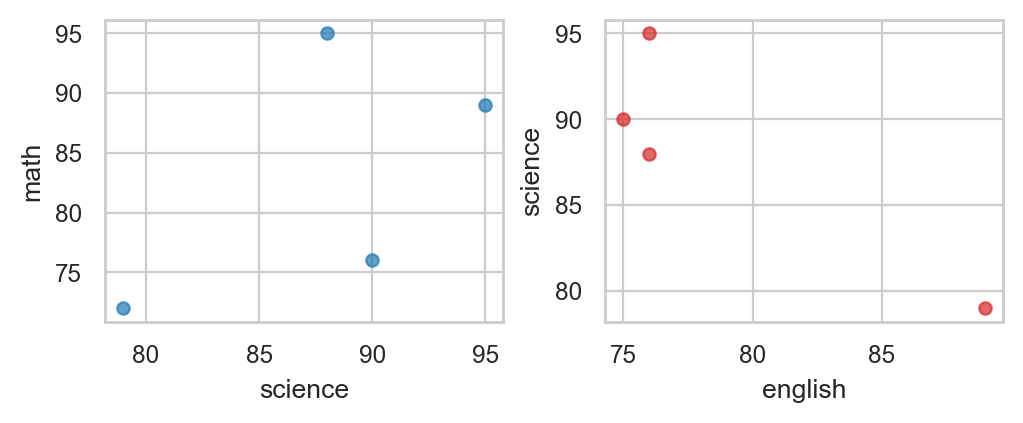

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,2))

df.plot(kind="scatter",
       x = "science",
       y = "math",
       color = "tab:blue",
       alpha = 0.7,
       ax = ax1);

df.plot(kind="scatter",
       x = "english",
       y = "science",
       color = "tab:red",
       alpha = 0.7,
       ax = ax2);

두 수치 데이터 $\mathbf{x} = (x_1, x_2, \ldots, x_n)$, $\mathbf{y} = (y_1, y_2, \ldots, y_n)$에 대해서 Pearson 상관계수를 다음과 같이 정의한다:

\begin{align*}
r_{\mathbf{x}\mathbf{y}} &= 
\frac{\text{Cov}(\mathbf{x},\mathbf{y})}{\sigma_{\mathbf{x}}\sigma_{\mathbf{y}}}\\
& = \frac{\sum_{i=1}^n(x_i-\overline{\mathbf{x}})(y_i-\overline{\mathbf{y}})}{\sqrt{\sum_{i=1}^n(x_i-\overline{\mathbf{x}})^2}\sqrt{{\sum_{i=1}^n(y_i-\overline{\mathbf{y}})^2}}}.
\end{align*}
여기서
\begin{equation*}
\overline{\mathbf{x}} = \frac{\sum_{i=1}^nx_i}{n},
\end{equation*}

\begin{equation*}
\overline{\mathbf{y}} = \frac{\sum_{i=1}^ny_i}{n}
\end{equation*}
이다.

In [13]:
df.corr()

,math,english,science
math,1.000000,-0.62799,0.586432
english,-0.627990,1.00000,-0.888060
science,0.586432,-0.88806,1.000000


In [14]:
## 수학과 과학의 Pearson's correlation을 계산하시오.

# 수학평균
math_mean = np.sum(df["math"])/len(df)

#수학 표준편차
math_std = np.sqrt(np.sum((df["math"] - math_mean)**2))


# 과학평균
science_mean = np.sum(df["science"])/len(df)

# 과학 표준편차
science_std = np.sqrt(np.sum((df["science"] - science_mean)**2))

# 공분산
cov = np.sum((df["math"] - math_mean)*(df["science"] - science_mean))

print("수학과 과학 과목의 상관계수 직접 계산한 값: ", cov/(math_std*science_std))
print("pandas가 계산한 값: ", df.corr().loc["math"]["science"])

수학과 과학 과목의 상관계수 직접 계산한 값:  0.5864315126053049
pandas가 계산한 값:  0.5864315126053049


**스피어만 상관계수**

* 두 데이터 사이의 순위(rank)에 대한 상관 계수
* numerical이나 ordinal 데이터에 대한 상관 관계를 분석할 수 있다.
* 스피어만 상관계수의 해석은 피어슨 상관계수와 같다.
* 스피어만 상관 계수는 피어슨 상관 계수에 비해 이상치에 덜 민감하다.

두 수치 데이터 $\mathbf{x} = (x_1, x_2, \ldots, x_n)$, $\mathbf{y} = (y_1, y_2, \ldots, y_n)$에 대해서 $R(x_i)$를 $\mathbf{x}$에서 $x_i$의 순서, $R(y_i)$를 $\mathbf{y}$에서 $y_i$의 순서라고 하자.

Spearman 상관계수를 다음과 같이 정의한다:

\begin{align*}
r_{R(\mathbf{x})R(\mathbf{y})} &= 
\frac{\text{Cov}(R(\mathbf{x}),R(\mathbf{y}))}{\sigma_{R(\mathbf{x})}\sigma_{R(\mathbf{x})}}
\end{align*}
만약 데이터의 순서가 단조증가라면 다음과 같이 계산할 수 있다:
$$
r_{R(\mathbf{x})R(\mathbf{y})} = 1-\frac{6\cdot\sum_{i=1}^nd_i^2}{n(n^2-1)}.
$$
여기서
$d_i = R(x_i) - R(y_i)$이다.

In [15]:
df

,math,english,science
Ha,89,76,95
Heo,76,75,90
Na,72,89,79
Park,95,76,88


In [16]:
df.corr(method = "pearson")

,math,english,science
math,1.000000,-0.62799,0.586432
english,-0.627990,1.00000,-0.888060
science,0.586432,-0.88806,1.000000


In [17]:
df.corr(method="spearman")

,math,english,science
math,1.000000,-0.316228,0.400000
english,-0.316228,1.000000,-0.632456
science,0.400000,-0.632456,1.000000
